In [1]:
# Data from scikit-learn's bundled California Housing dataset
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
cali.data.shape

(20640, 8)

In [2]:
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
import pandas as pd
pd.set_option('precision', 2)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

In [4]:
# Create dataframe
cali_df = pd.DataFrame(cali.data, columns=cali.feature_names)

In [5]:
# Add new column for median house values, which are in the target
cali_df['MedHouseValue'] = pd.Series(cali.target)
cali_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0    8.33      41.0      6.98       1.02       322.0      2.56     37.88   
1    8.30      21.0      6.24       0.97      2401.0      2.11     37.86   
2    7.26      52.0      8.29       1.07       496.0      2.80     37.85   
3    5.64      52.0      5.82       1.07       558.0      2.55     37.85   
4    3.85      52.0      6.28       1.08       565.0      2.18     37.85   

   Longitude  MedHouseValue  
0    -122.23           4.53  
1    -122.22           3.58  
2    -122.24           3.52  
3    -122.25           3.41  
4    -122.25           3.42

In [6]:
cali_df.describe()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  MedHouseValue  
count  20640.00   20640.00       20640.00  
mean      35.63    -119.57           2.07  
std        2.14       2.00           1.15  
min       32.54    -124.35           0.15  
25%       33.93    -121.80           1.20  
50%       34.26    -118.49           1.80  
75%       37.71    -118.01           2.65  
max       41.95    -114.31           5.00

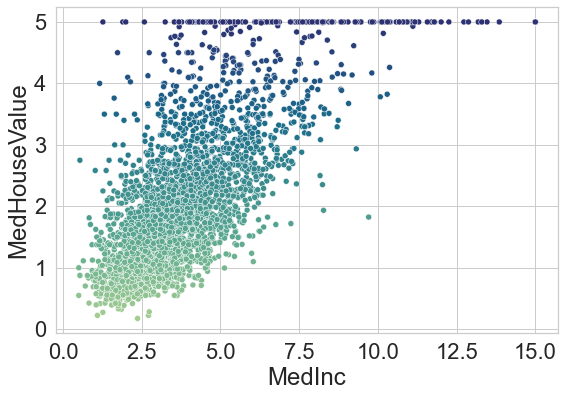

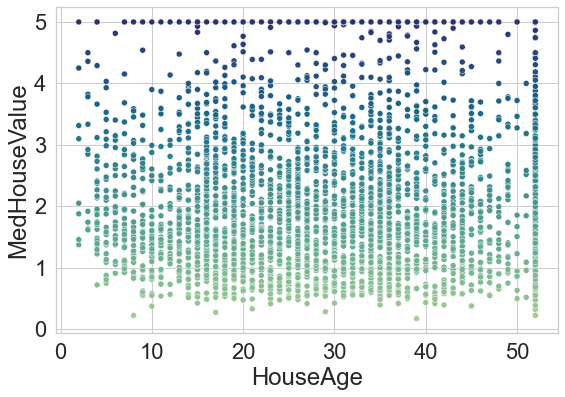

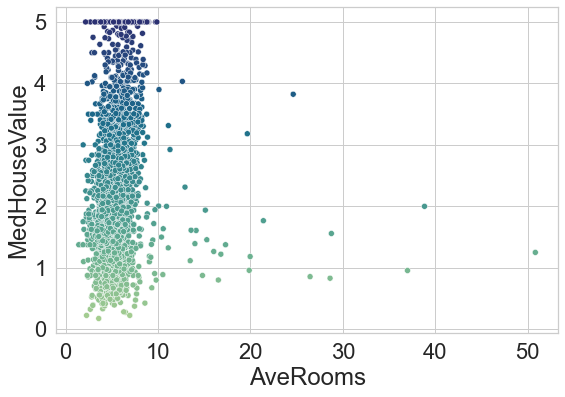

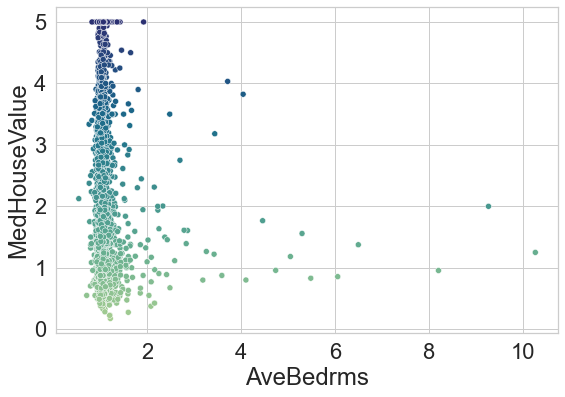

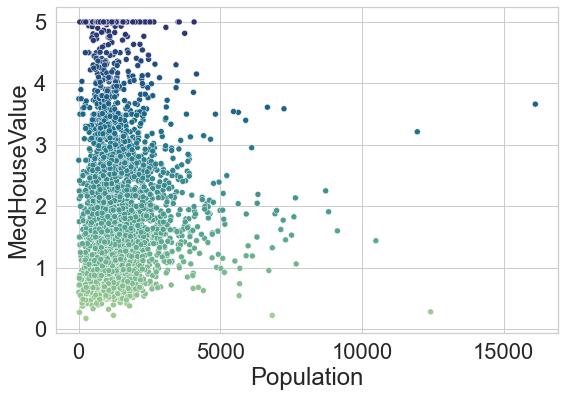

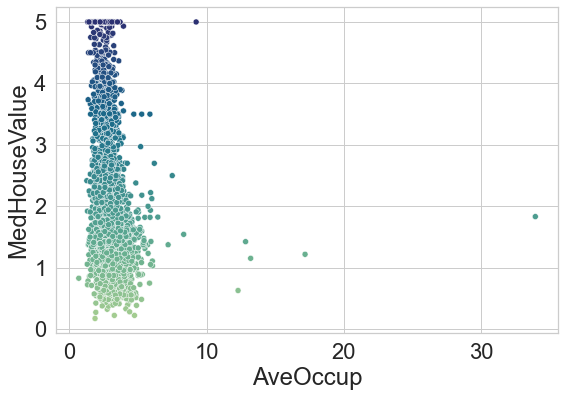

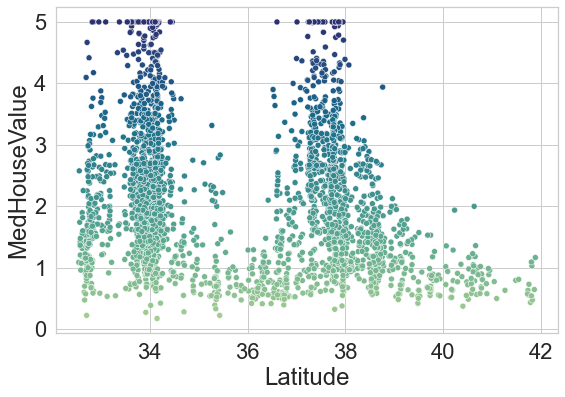

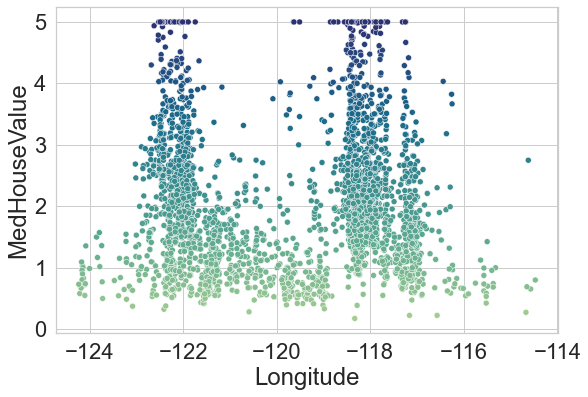

In [7]:
# Data exploration: visualizing a sample of the data (15%)
sample_df = cali_df.sample(frac=0.15, random_state=24)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in cali.feature_names:
    plt.figure(figsize=(9, 6))
    sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', 
    hue='MedHouseValue', palette='crest', legend=False)

In [8]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cali.data, cali.target, random_state=24) # Seed chosen arbitrarily

In [9]:
# Train a LinearRegression estimator
from sklearn.linear_model import LinearRegression
cali_lr = LinearRegression()
cali_lr.fit(X=X_train, y=y_train)

LinearRegression()

In [10]:
# Slope for each feature
for i, name in enumerate(cali.feature_names):
    print(f'{name:<10}: {cali_lr.coef_[i]}')

MedInc    : 0.42711345523181
HouseAge  : 0.0097791677011777
AveRooms  : -0.09359766035453483
AveBedrms : 0.5744955094182399
Population: -1.4451071137511632e-07
AveOccup  : -0.0033151929336662786
Latitude  : -0.4306445771125448
Longitude : -0.44362159590182093


In [11]:
cali_lr.intercept_

-37.67949087571134

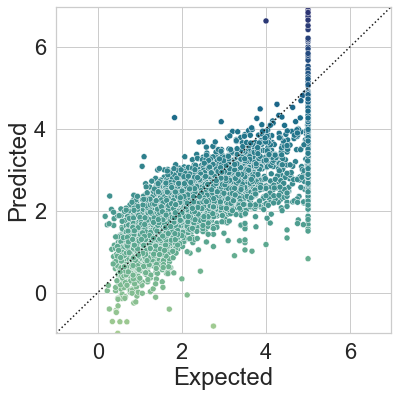

In [12]:
# Test the model through visualization
predicted = cali_lr.predict(X_test)
expected = y_test

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

test_fig = plt.figure(figsize=(6, 6))
axes = sns.scatterplot(x=df.Expected, y=df.Predicted, hue=df.Predicted, 
                       palette='crest', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

# Line represents 100% accurate predictions
line = plt.plot([start, end], [start, end], 'k:')

In [13]:
# Test the model through regression model metrics
from sklearn import metrics
print(metrics.r2_score(expected, predicted)) # R squared score
print(metrics.mean_squared_error(expected, predicted)) # Mean squared error

0.6091628763956283
0.5226358519781041
